In [1]:
#import basic liabaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data set
df=pd.read_csv("news.csv")

In [3]:
df.head()

,text,subject,fake
0,Donald Trump just couldn t wish all Americans ...,News,1
1,House Intelligence Committee Chairman Devin Nu...,News,1
2,"On Friday, it was revealed that former Milwauk...",News,1
3,"On Christmas day, Donald Trump announced that ...",News,1
4,Pope Francis used his annual Christmas Day mes...,News,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


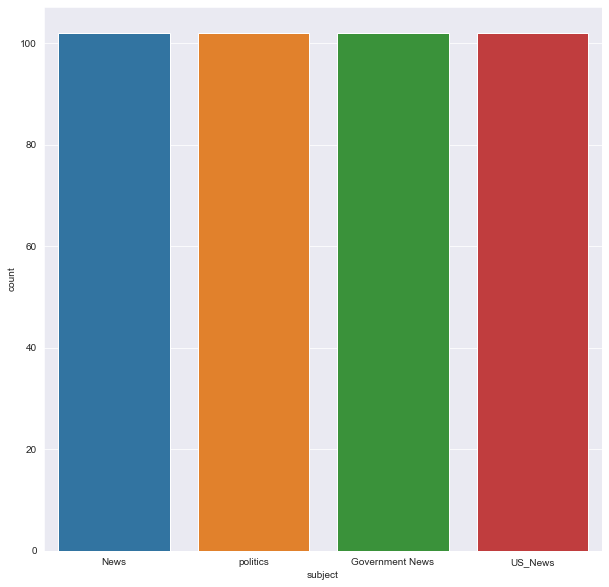

In [4]:
import matplotlib.pyplot as plt
df['subject'].value_counts()
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(df['subject']);

[Text(0, 0, '0'), Text(1, 0, '1')]

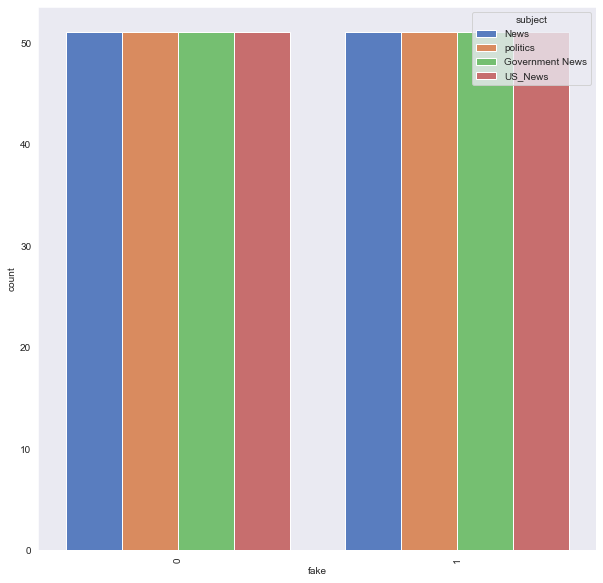

In [5]:
plt.figure(figsize = (10,10))
sns.set_style("dark")
chart = sns.countplot(x = "fake", hue = "subject" , data = df , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [6]:
#check null value
df.isnull().sum()

text       0
subject    0
fake       0
dtype: int64

In [7]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     408 non-null    object
 1   subject  408 non-null    object
 2   fake     408 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.7+ KB


In [8]:
from wordcloud import WordCloud,STOPWORDS

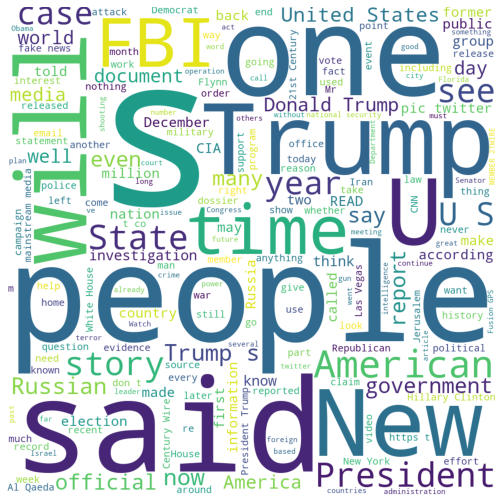

In [9]:
#generate word cloud
wc=WordCloud(background_color="white",height=1000,width=1000,min_font_size=10,stopwords=STOPWORDS)
wc.generate("".join(df[df["fake"]==1]["text"]))
plt.figure(figsize=(9,9))
plt.imshow(wc)
plt.axis("off")
plt.show()

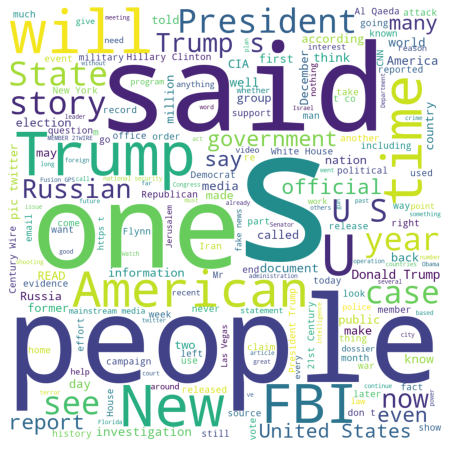

In [10]:
wc=WordCloud(background_color="white",height=1000,width=1000,stopwords=STOPWORDS,min_font_size=10)
wc.generate("".join(df[df["fake"]==0]["text"]))
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [11]:
#Text preprocessing : -
#List of stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from string import punctuation

In [12]:
# data cleaning function create for clean the document
def clean_text(text):
    stop = stopwords.words('english') #stopwords list
    punc = list(punctuation) #punctuation list
    bad_tokens = stop + punc
    lemma = WordNetLemmatizer()
    tokens = word_tokenize(text) # tokenization
    word_tokens = [t for t in tokens if t.isalpha()] # removing numbers 
    # lemmatization,  stopwords & punctuation removal, to lower case
    clean_token = [lemma.lemmatize(t.lower()) for t in word_tokens if t not in bad_tokens]
    return " ".join(clean_token)

In [13]:
df["text"]=df["text"].apply(clean_text)

In [14]:
df["text"]

0      donald trump wish american happy new year leav...
1      house intelligence committee chairman devin nu...
2      on friday revealed former milwaukee sheriff da...
3      on christmas day donald trump announced would ...
4      pope francis used annual christmas day message...
                             ...                        
403    tune alternate current radio network acr anoth...
404    shawn helton century wirewhen looking deeply e...
405    antifa photo twitter diana johnstone century w...
406    two protagonist jesus campos alleged shooter s...
407    this latest move america notorious transportat...
Name: text, Length: 408, dtype: object

In [15]:
#separate input and output from dataset
X = df['text'] #input
Y = df["fake"] #output

In [16]:
#train test split (70-30%  , 75-25% and 80%-20%)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

accuracy:   12.195


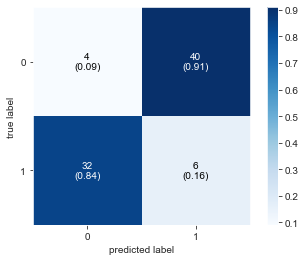

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics             
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
#SVM
from sklearn.svm import LinearSVC
pipe = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LinearSVC())
])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)

score = metrics.accuracy_score(y_test, prediction)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, prediction, labels=[0,1])



fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, prediction),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()